### Import Packages

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# pip install scikit-learn
# !pip install statsmodels
# !pip install seaborn
# !pip install graphviz

In [3]:
import pymc as pm
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from scipy import special, stats
import statsmodels.api as sm
# Graphics and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
az.style.use('arviz-darkgrid')
color = '#87ceeb'
# Random seed
random_seed = 730612

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Data and EDA

In [4]:
data = pd.read_csv("C:/Users/jacqu/Downloads/archive/heart_attack_prediction_dataset.csv")

In [5]:
data.head()

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                                0   
1  27.194973            235                                1   
2  28.176571            587                                4   
3  36.464704            378                                3   
4  21.809144            231                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                    6  Argentina  South America  Southern Hemisphere   
1                    7     Canada  North America  Northern Hemisphere   
2                    4     France         Europe  Northern Hemisphere   
3                    4     Canada  North America  Northern Hemisphere   
4                    5   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 26 columns]

In [6]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [7]:
data.drop(["Patient ID", "Blood Pressure", 'Income', 'Country',
       'Continent', 'Hemisphere'], axis = 1, inplace = True)

In [8]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [9]:
cate_data = train_data[['Diet', 'Stress Level',
                  'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Sex',
                  'Diabetes', 'Family History', 'Smoking', 'Obesity',
                  'Previous Heart Problems', 'Medication Use','Heart Attack Risk']]
cate_data.head()

Diet  Stress Level  Physical Activity Days Per Week  \
5967    Average            10                                3   
8270  Unhealthy             1                                2   
100     Average            10                                4   
3410    Average             4                                1   
1790    Average             6                                2   

      Sleep Hours Per Day   Sex  Diabetes  Family History  Smoking  Obesity  \
5967                    6  Male         1               1        1        1   
8270                    4  Male         1               0        1        0   
100                     5  Male         1               0        1        0   
3410                    4  Male         0               0        1        0   
1790                    4  Male         0               1        1        1   

      Previous Heart Problems  Medication Use  Heart Attack Risk  
5967                        0               1                  0  
8270                        1               0                  1  
100                         1               0                  0  
3410                        1               0                  0  
1790                        0               0                  0

C:\Users\jacqu\AppData\Local\Temp\ipykernel_37616\2745853581.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


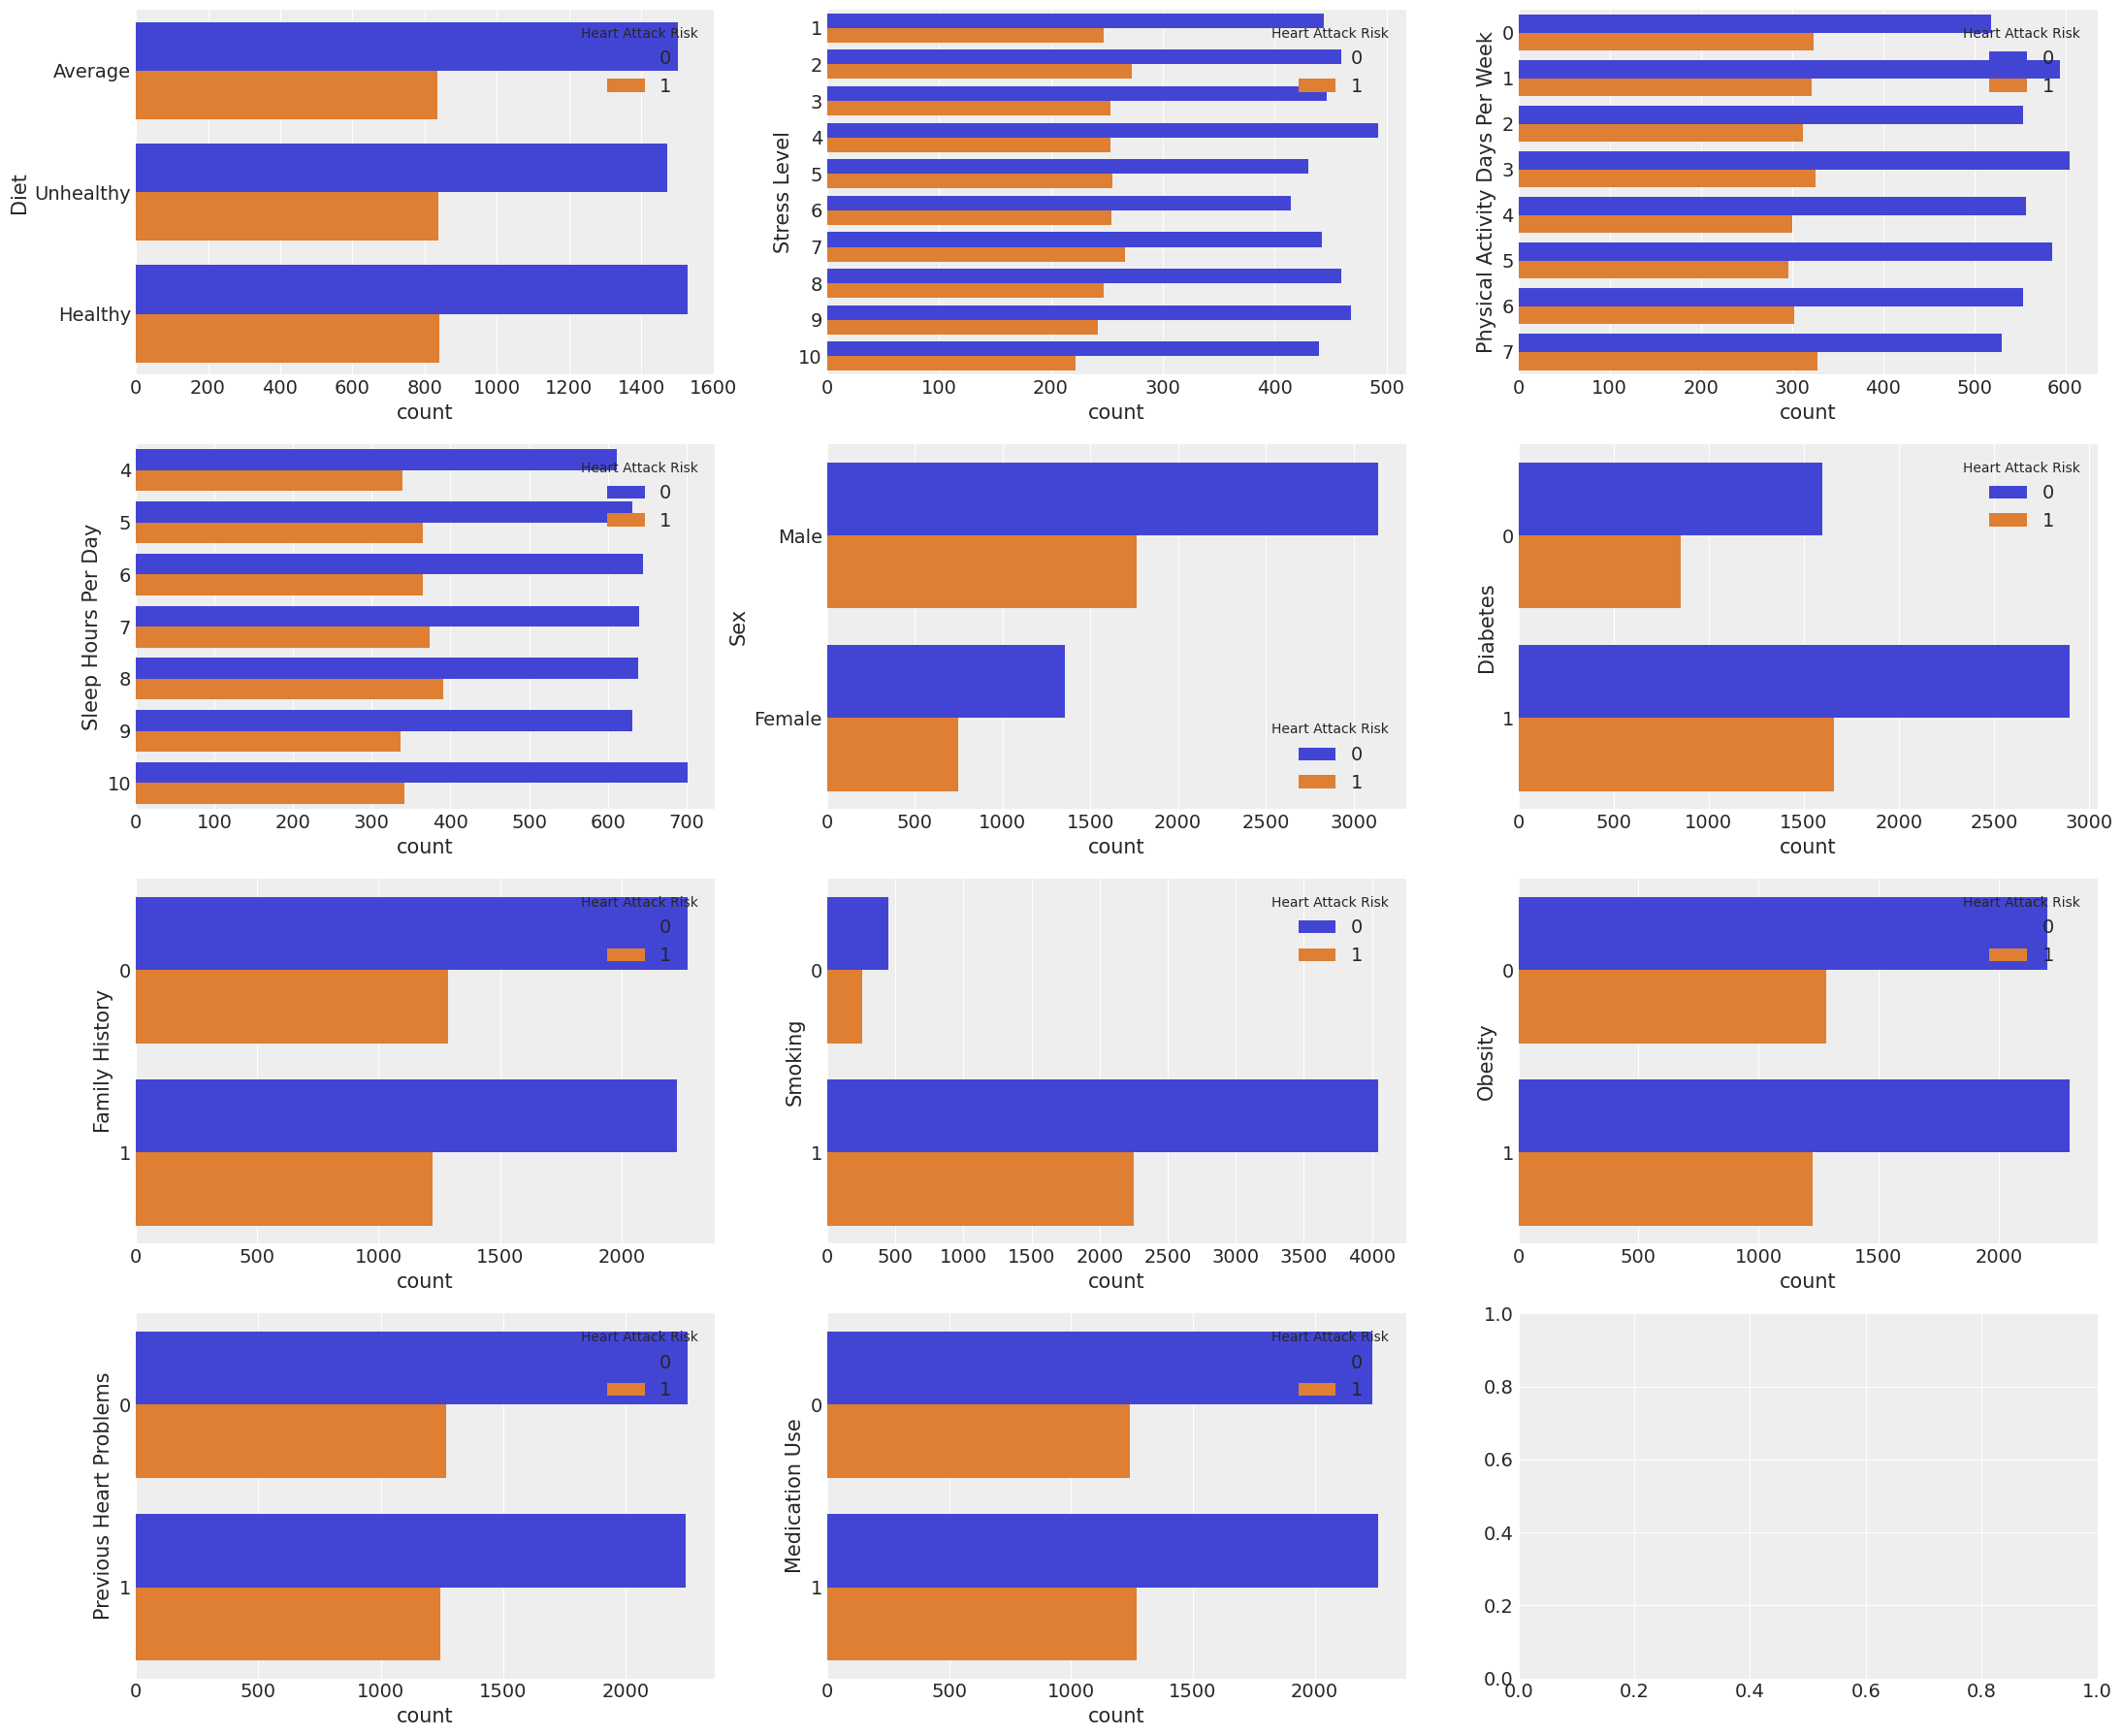

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(22, 18))
sns.countplot(y="Diet", hue="Heart Attack Risk", ax=axes[0,0], data=cate_data)
sns.countplot(y="Stress Level", hue="Heart Attack Risk", ax=axes[0,1], data=cate_data)
sns.countplot(y="Physical Activity Days Per Week", hue="Heart Attack Risk", ax=axes[0,2], data=cate_data)
sns.countplot(y="Sleep Hours Per Day", hue="Heart Attack Risk", ax=axes[1,0], data=cate_data)
sns.countplot(y="Sex", hue="Heart Attack Risk", ax=axes[1,1], data=cate_data)
sns.countplot(y="Diabetes", hue="Heart Attack Risk", ax=axes[1,2], data=cate_data)
sns.countplot(y="Family History", hue="Heart Attack Risk", ax=axes[2,0], data=cate_data)
sns.countplot(y="Smoking", hue="Heart Attack Risk", ax=axes[2,1], data=cate_data)
sns.countplot(y="Obesity", hue="Heart Attack Risk", ax=axes[2,2], data=cate_data)
sns.countplot(y="Previous Heart Problems", hue="Heart Attack Risk", ax=axes[3,0], data=cate_data)
sns.countplot(y="Medication Use", hue="Heart Attack Risk", ax=axes[3,1], data=cate_data)
plt.tight_layout()
plt.show()

In [11]:
cont_data = train_data[['Age', 'Cholesterol',
       'Heart Rate', 'Exercise Hours Per Week',
       'Sedentary Hours Per Day', 'BMI', 'Triglycerides','Heart Attack Risk']]
cont_data.head()

Age  Cholesterol  Heart Rate  Exercise Hours Per Week  \
5967   84          217          75                17.107142   
8270   88          209         104                 2.851698   
100    90          224          98                 3.560949   
3410   27          376          65                19.035090   
1790   55          270          94                 0.968271   

      Sedentary Hours Per Day        BMI  Triglycerides  Heart Attack Risk  
5967                 1.737428  35.185856            544                  0  
8270                11.876890  30.991599            649                  1  
100                  9.618701  22.851796            255                  0  
3410                 1.968503  37.513424            796                  0  
1790                 7.252388  23.269040            450                  0

In [12]:
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
sns.kdeplot(x="Age", hue="Heart Attack Risk", ax=axes[0,0], data=cont_data)
sns.kdeplot(x="Cholesterol", hue="Heart Attack Risk", ax=axes[0,1], data=cont_data)
sns.kdeplot(x="Heart Rate", hue="Heart Attack Risk", ax=axes[1,0], data=cont_data)
sns.kdeplot(x="Exercise Hours Per Week", hue="Heart Attack Risk", ax=axes[1,1], data=cont_data)
sns.kdeplot(x="Sedentary Hours Per Day", hue="Heart Attack Risk", ax=axes[2,0], data=cont_data)
sns.kdeplot(x="BMI", hue="Heart Attack Risk", ax=axes[2,1], data=cont_data)
sns.kdeplot(x="Triglycerides", hue="Heart Attack Risk", ax=axes[3,0], data=cont_data)
plt.tight_layout()
plt.show()

C:\Users\jacqu\AppData\Local\Temp\ipykernel_37616\125253935.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


C:\Users\jacqu\anaconda3\envs\bayesml\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


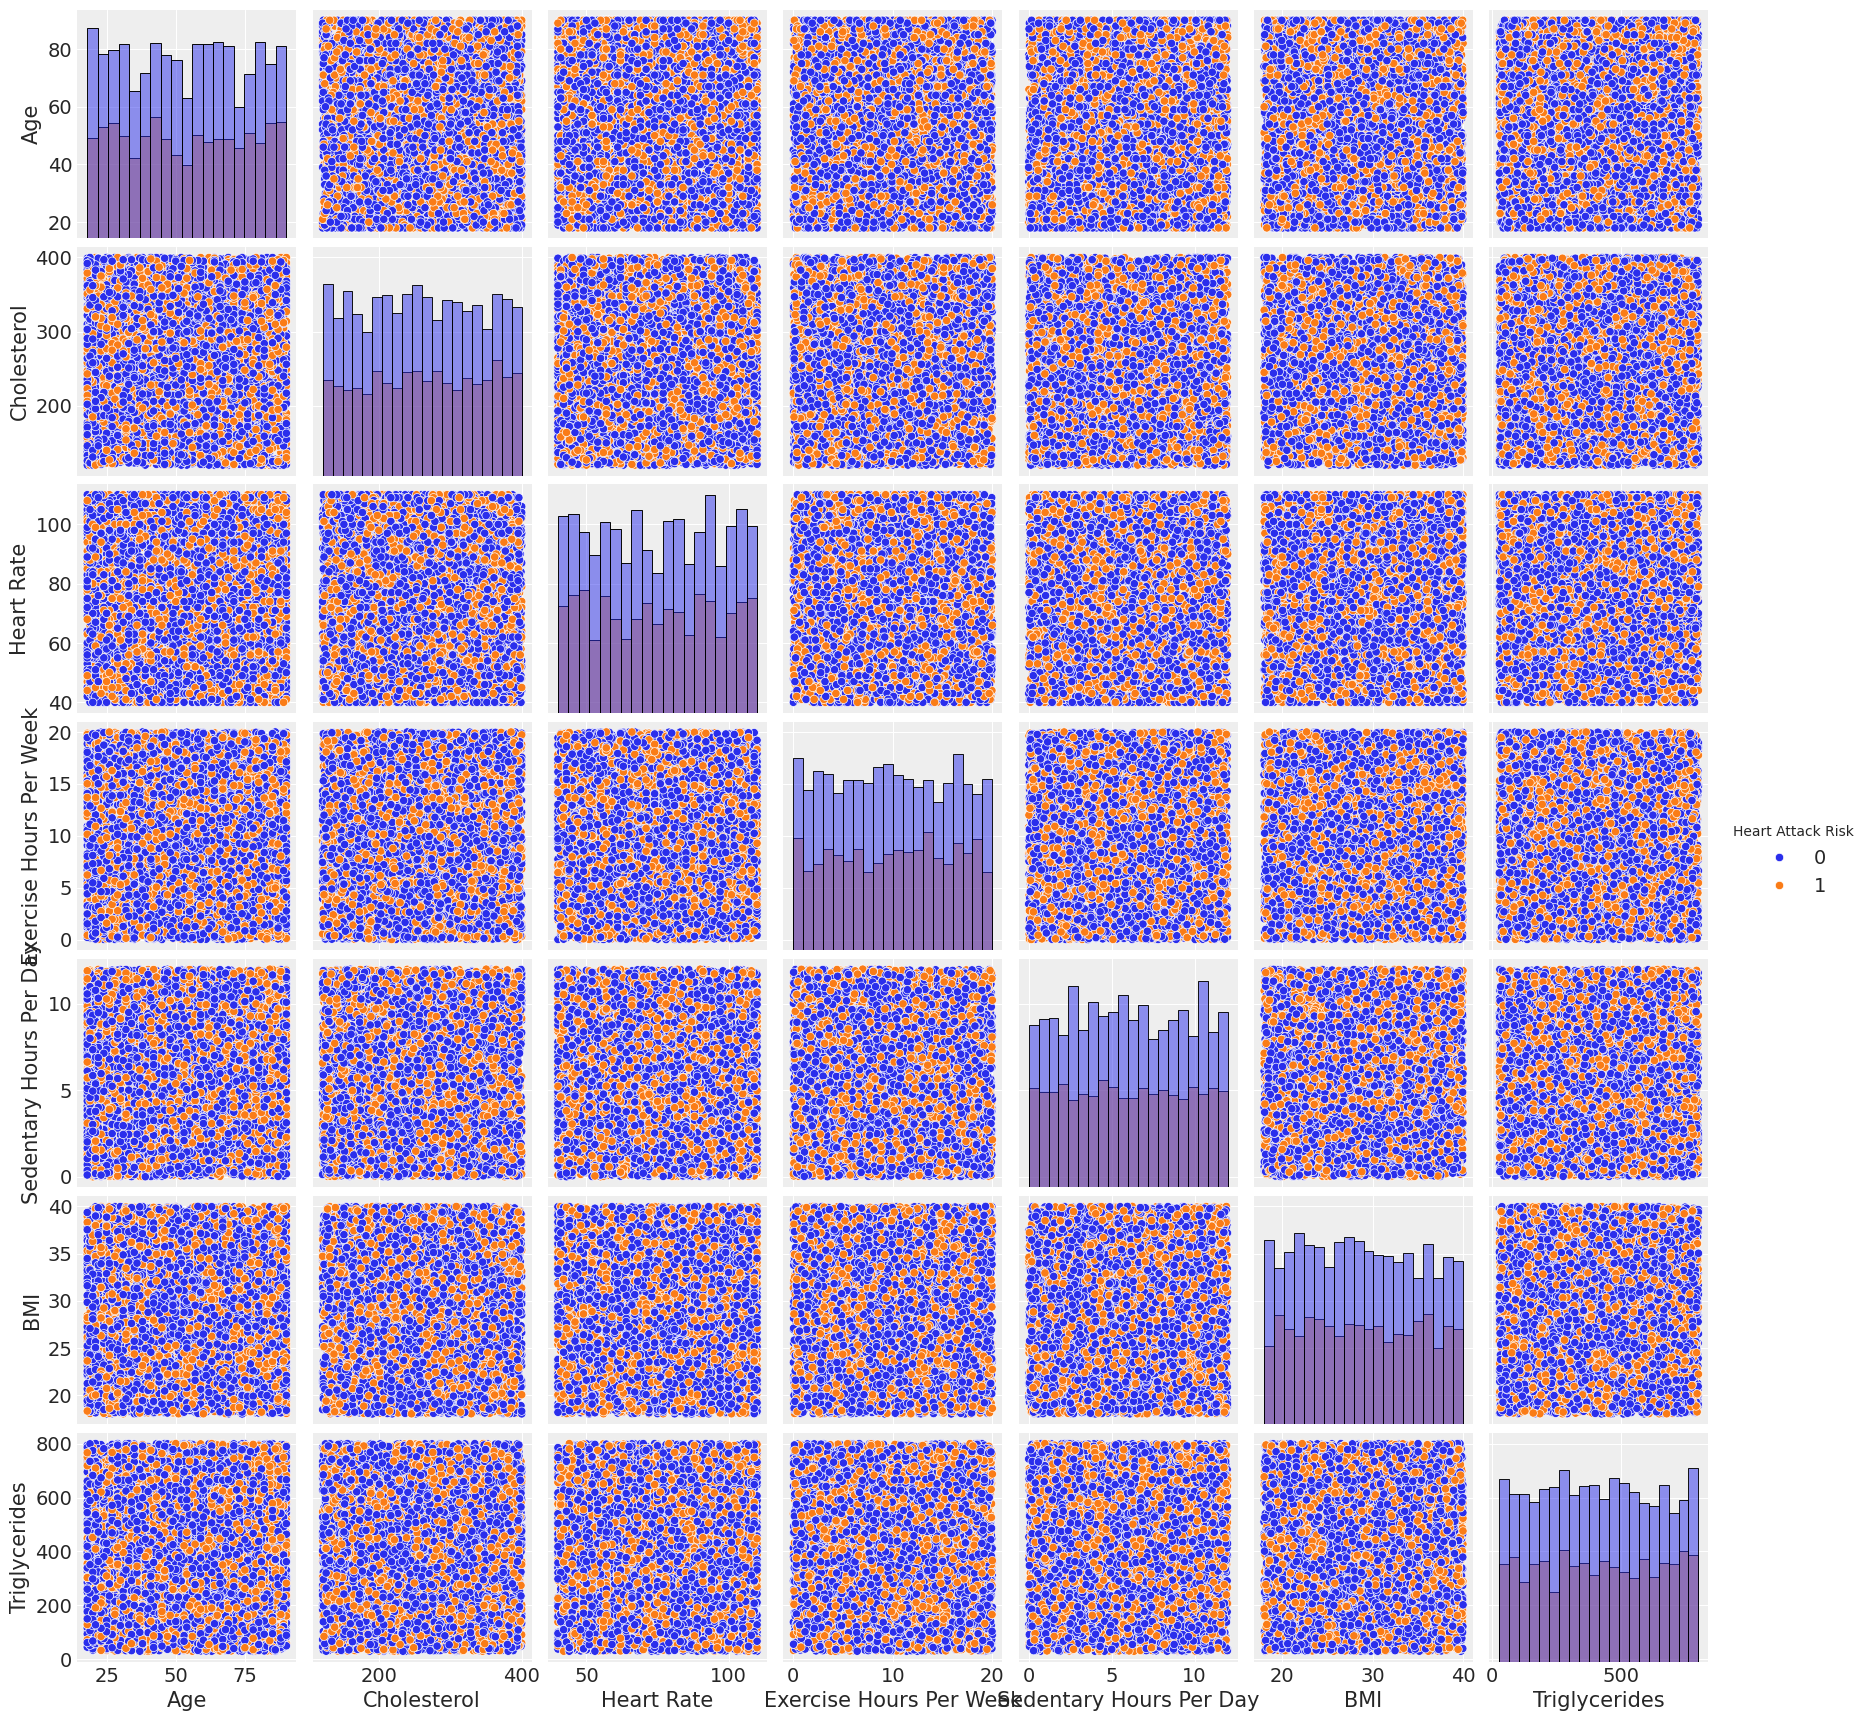

In [13]:
sns.pairplot(cont_data, hue='Heart Attack Risk', diag_kind='hist')

### Data Cleaning/Processing

In [14]:
train_data.isna().sum()

Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
dtype: int64

In [15]:
train_data.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk'],
      dtype='object')

In [16]:
risk = train_data.loc[:,"Heart Attack Risk"].values

In [17]:
train_data.drop(["Heart Attack Risk"], axis = 1, inplace = True)
data_train = pd.get_dummies(train_data, drop_first = False, dtype = float)
data_train.describe(include = 'all')

Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  7010.000000  7010.000000  7010.000000  7010.000000     7010.000000   
mean     53.828103   260.260200    75.005991     0.650214        0.492439   
std      21.247973    80.945417    20.648371     0.476936        0.499978   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   260.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  7010.000000  7010.000000          7010.000000              7010.000000   
mean      0.898573     0.502710             0.594722                 9.982400   
std       0.301914     0.500028             0.490981                 5.777452   
min       0.000000     0.000000             0.000000                 0.004443   
25%       1.000000     0.000000             0.000000                 4.991486   
50%       1.000000     1.000000             1.000000                10.021392   
75%       1.000000     1.000000             1.000000                15.006483   
max       1.000000     1.000000             1.000000                19.998709   

       Previous Heart Problems  ...  Sedentary Hours Per Day          BMI  \
count              7010.000000  ...              7010.000000  7010.000000   
mean                  0.497860  ...                 5.998180    28.863400   
std                   0.500031  ...                 3.460487     6.304254   
min                   0.000000  ...                 0.001529    18.002337   
25%                   0.000000  ...                 3.000299    23.390778   
50%                   0.000000  ...                 5.941544    28.751997   
75%                   1.000000  ...                 9.026902    34.313288   
max                   1.000000  ...                11.999313    39.997211   

       Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
count    7010.000000                      7010.000000          7010.000000   
mean      415.252924                         3.484593             7.033524   
std       223.305089                         2.275655             1.992321   
min        30.000000                         0.000000             4.000000   
25%       223.000000                         1.000000             5.000000   
50%       413.000000                         3.000000             7.000000   
75%       607.000000                         5.000000             9.000000   
max       800.000000                         7.000000            10.000000   

        Sex_Female     Sex_Male  Diet_Average  Diet_Healthy  Diet_Unhealthy  
count  7010.000000  7010.000000   7010.000000   7010.000000     7010.000000  
mean      0.300285     0.699715      0.333096      0.337660        0.329244  
std       0.458415     0.458415      0.471354      0.472946        0.469972  
min       0.000000     0.000000      0.000000      0.000000        0.000000  
25%       0.000000     0.000000      0.000000      0.000000        0.000000  
50%       0.000000     1.000000      0.000000      0.000000        0.000000  
75%       1.000000     1.000000      1.000000      1.000000        1.000000  
max       1.000000     1.000000      1.000000      1.000000        1.000000  

[8 rows x 22 columns]

In [18]:
data_train.columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Sex_Female',
       'Sex_Male', 'Diet_Average', 'Diet_Healthy', 'Diet_Unhealthy'],
      dtype='object')

### Full model

In [19]:
X_s = data_train[['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day']].to_numpy()

In [20]:
categorical_var = data_train.loc[:,['Sex_Female',
       'Sex_Male', 'Diet_Average', 'Diet_Healthy', 'Diet_Unhealthy']].columns

data_train[categorical_var].to_numpy()
X_data = np.hstack((X_s, data_train[categorical_var].to_numpy()))

In [21]:
X_data.shape

(7010, 22)

In [22]:
pd.DataFrame(X_data).head()

0      1      2    3    4    5    6    7          8    9   ...  \
0  84.0  217.0   75.0  1.0  1.0  1.0  1.0  1.0  17.107142  0.0  ...   
1  88.0  209.0  104.0  1.0  0.0  1.0  0.0  1.0   2.851698  1.0  ...   
2  90.0  224.0   98.0  1.0  0.0  1.0  0.0  1.0   3.560949  1.0  ...   
3  27.0  376.0   65.0  0.0  0.0  1.0  0.0  1.0  19.035090  1.0  ...   
4  55.0  270.0   94.0  0.0  1.0  1.0  1.0  1.0   0.968271  0.0  ...   

          12         13     14   15   16   17   18   19   20   21  
0   1.737428  35.185856  544.0  3.0  6.0  0.0  1.0  1.0  0.0  0.0  
1  11.876890  30.991599  649.0  2.0  4.0  0.0  1.0  0.0  0.0  1.0  
2   9.618701  22.851796  255.0  4.0  5.0  0.0  1.0  1.0  0.0  0.0  
3   1.968503  37.513424  796.0  1.0  4.0  0.0  1.0  1.0  0.0  0.0  
4   7.252388  23.269040  450.0  2.0  4.0  0.0  1.0  1.0  0.0  0.0  

[5 rows x 22 columns]

In [23]:
k = X_data.shape[1]

with pm.Model() as logistic_model:
    β = pm.Uniform('β', lower=0, upper=1000, shape=k)

    p = pm.Deterministic('p', pm.math.sigmoid(pm.math.dot(X_data, β)))

    risk_obs = pm.Bernoulli('risk_obs', p=pm.math.invlogit(p), observed=risk)

# pm.model_to_graphviz(logistic_model)

In [ ]:
with logistic_model:
    trace = pm.sample(2000, tune=1000, cores=8, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [β]


In [ ]:
az.plot_trace(trace, kind = 'rank_bars', compact = False)

### Patient Specfic

In [ ]:
X_s_p = data_train[['Age', 'Cholesterol', 'Heart Rate', 'Diabetes',
                    'Family History', 'Obesity', 'Previous Heart Problems',
                    'Medication Use', 'Stress Level', 'BMI', 'Triglycerides']].to_numpy()

categorical_var_p = data_train.loc[:,['Sex_Female', 'Sex_Male']].columns

In [ ]:
data_train[categorical_var_p].to_numpy()
X_data_p = np.hstack((X_s_p, data_train[categorical_var_p].to_numpy()))

In [ ]:
k_p = X_data_p.shape[1]

with pm.Model() as logistic_model_p:
    β = pm.Uniform('β', lower=0, upper=1000, shape=k_p)

    p = pm.Deterministic('p', pm.math.sigmoid(pm.math.dot(X_data_p, β)))

    risk_obs = pm.Bernoulli('risk_obs', p=pm.math.invlogit(p), observed=risk)

# pm.model_to_graphviz(logistic_model_p)

In [ ]:
with logistic_model_p:
    p_trace = pm.sample(2000, tune=1000, cores=8, target_accept=0.95)

In [ ]:
az.plot_trace(p_trace, kind = 'rank_bars', compact = False)

### Lifestyle Specfic

In [ ]:
X_s_l = data_train[[
       'Smoking', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Sedentary Hours Per Day',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day']].to_numpy()

categorical_var_l = data_train.loc[:,['Diet_Average', 'Diet_Healthy', 'Diet_Unhealthy']].columns

In [ ]:
data_train[categorical_var_l].to_numpy()
X_data_l = np.hstack((X_s_l, data_train[categorical_var_l].to_numpy()))

In [ ]:
k_l = X_data_l.shape[1]

with pm.Model() as logistic_model_l:
    β = pm.Uniform('β', lower=0, upper=1000, shape=k_l)

    p = pm.Deterministic('p', pm.math.sigmoid(pm.math.dot(X_data_l, β)))

    risk_obs = pm.Bernoulli('risk_obs', p=pm.math.invlogit(p), observed=risk)

# pm.model_to_graphviz(logistic_model_l)

In [ ]:
with logistic_model_l:
    l_trace = pm.sample(2000, tune=1000, cores=8, target_accept=0.95)

In [ ]:
az.plot_trace(l_trace, kind = 'rank_bars', compact = False)

### Model Evulation(s)

In [ ]:
traces = [trace, p_trace, l_trace]
az.plot_forest(traces, figsize=(10, 5));

In [ ]:
model_dict = dict(zip(["logistic_model", "logistic_model_p", "logistic_model_l"], traces))
comp = az.compare(model_dict)
comp

### Model Averaging

In [ ]:
ppc_w = pm.sample_posterior_predictive_w(
    traces=traces,
    models=[logistic_model, logistic_model_p, logistic_model_l],
    weights=comp.weight.sort_index(ascending=True),
    progressbar=True,
)

In [ ]:
az.compare(ppc_w, method="stacking")

In [ ]:
# WAIC for the two models
cmp_waic = az.compare({'model_full':trace, 'model_p':p_trace, 'model_l': l_trace}, ic='waic')
cmp_waic

# Graphical WAIC comparisons
az.plot_compare(cmp_waic, figsize = (10,8));